# Evolutionary Computation Assignment 2

- Krzysztof Szala 144571
- Vadym Repetskyi 155610


In [1]:
from utils import TspInstance
import numpy as np
import pandas as pd

tsp_a = TspInstance("TSPA.csv")
tsp_b = TspInstance("TSPB.csv")

## Greedy 2-regret heuristic

1. Initialize the **_cycle_** with a random node and another node "closest" to it.
2. While there are nodes to add:
   1. Calculate the _cost_ increase each possible insertion will introduce if added at **_arbitrary position_**.
   2. Calculate the _regret_ which is defined as the **_difference between the best insertion cost and the second best insertion cost_**
   3. Select the node with the **_greatest regret_** and insert it at the **_best possible position_**.


In [2]:
def regret(tsp: TspInstance, start_node: int):
    solution = [start_node, np.argmin(tsp.distance_matrix[start_node] + tsp.node_costs)]

    while len(solution) < np.ceil(tsp.size / 2):
        selected_node_index = selected_insertion_index = max_regret = None

        for node_index in range(tsp.size):
            if node_index in solution:
                continue

            def get_cost(insertion_index: int):
                start = solution[insertion_index]
                end = solution[(insertion_index + 1) % len(solution)]
                cost = (
                    tsp.node_costs[node_index]
                    + tsp.distance_matrix[start][node_index]
                    + tsp.distance_matrix[node_index][end]
                    - tsp.distance_matrix[start][end]
                )
                return cost

            insertion_costs = tuple(
                get_cost(insertion_index) for insertion_index in range(len(solution))
            )

            sorted = np.argsort(insertion_costs)

            if len(insertion_costs) > 1:
                regret = insertion_costs[sorted[1]] - insertion_costs[sorted[0]]
            else:
                regret = insertion_costs[sorted[0]]

            if max_regret is None or regret > max_regret:
                selected_node_index = node_index
                selected_insertion_index = sorted[0]
                max_regret = regret

        solution.insert(selected_insertion_index + 1, selected_node_index)

    return solution

## Weighted 2-regret heuristic

1. Initialize the **_cycle_** with a random node and another node "closest" to it.
2. While there are nodes to add:
   1. Calculate the _cost_ increase each possible insertion will introduce if added at **_arbitrary position_**.
   2. Calculate the _regret_ which is defined as the **_difference between the best insertion cost and the second best insertion cost_**
   3. Calculate the **_weighted sum criterion_** which is defined as `0.5 * greatest_regret - 0.5 * least_insertion_cost`
   4. Select the node with the **_greatest weighted sum criterion_** and insert it at the **_best possible position_**.


In [3]:
def weighted(tsp: TspInstance, start_node: int):
    solution = [start_node, np.argmin(tsp.distance_matrix[start_node] + tsp.node_costs)]

    while len(solution) < np.ceil(tsp.size / 2):
        selected_node_index = selected_insertion_index = max_weighted_sum = None

        for node_index in range(tsp.size):
            if node_index in solution:
                continue

            def get_cost(insertion_index: int):
                start = solution[insertion_index]
                end = solution[(insertion_index + 1) % len(solution)]
                cost = (
                    tsp.node_costs[node_index]
                    + tsp.distance_matrix[start][node_index]
                    + tsp.distance_matrix[node_index][end]
                    - tsp.distance_matrix[start][end]
                )
                return cost

            insertion_costs = tuple(
                get_cost(insertion_index) for insertion_index in range(len(solution))
            )

            sorted = np.argsort(insertion_costs)

            if len(insertion_costs) > 1:
                regret = insertion_costs[sorted[1]] - insertion_costs[sorted[0]]
            else:
                regret = insertion_costs[sorted[0]]

            weighted_sum = 0.5 * regret - 0.5 * insertion_costs[sorted[0]]

            if max_weighted_sum is None or weighted_sum > max_weighted_sum:
                selected_node_index = node_index
                selected_insertion_index = sorted[0]
                max_weighted_sum = weighted_sum

        solution.insert(selected_insertion_index + 1, selected_node_index)

    return solution

## Experiments


In [4]:
experiments = (
    tsp_a.run_experiments(regret),
    tsp_b.run_experiments(regret),
    tsp_a.run_experiments(weighted),
    tsp_b.run_experiments(weighted),
)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Random A</th>
      <th>Random B</th>
      <th>NN-End A</th>
      <th>NN-End B</th>
      <th>NN-Any A</th>
      <th>NN-Any B</th>
      <th>Cycle A</th>
      <th>Cycle B</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>min</th>
      <td>235530.0</td>
      <td>187468.00</td>
      <td>76880.00</td>
      <td>47940.00</td>
      <td>71255.000</td>
      <td>48973.00</td>
      <td>70785.000</td>
      <td>49038.000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>294275.0</td>
      <td>239215.00</td>
      <td>105198.00</td>
      <td>67185.00</td>
      <td>74220.000</td>
      <td>57348.00</td>
      <td>76026.000</td>
      <td>57456.000</td>
    </tr>
    <tr>
      <th>avg</th>
      <td>264836.7</td>
      <td>213266.78</td>
      <td>83680.24</td>
      <td>52485.63</td>
      <td>72661.445</td>
      <td>51390.06</td>
      <td>73030.805</td>
      <td>51660.935</td>
    </tr>
  </tbody>
</table>
</div>

In [5]:
columns = (
    "Regret A",
    "Regret B",
    "Weighted A",
    "Weighted B",
)

pd.DataFrame(
    np.array(tuple(map(lambda x: x[:-1], experiments))).T,
    columns=columns,
    index=("min", "max", "avg"),
)

,Regret A,Regret B,Weighted A,Weighted B
min,105692.00,66162.00,70154.00,46832.000
max,126951.00,78406.00,73395.00,55700.000
avg,115164.15,72381.19,71943.07,50824.285


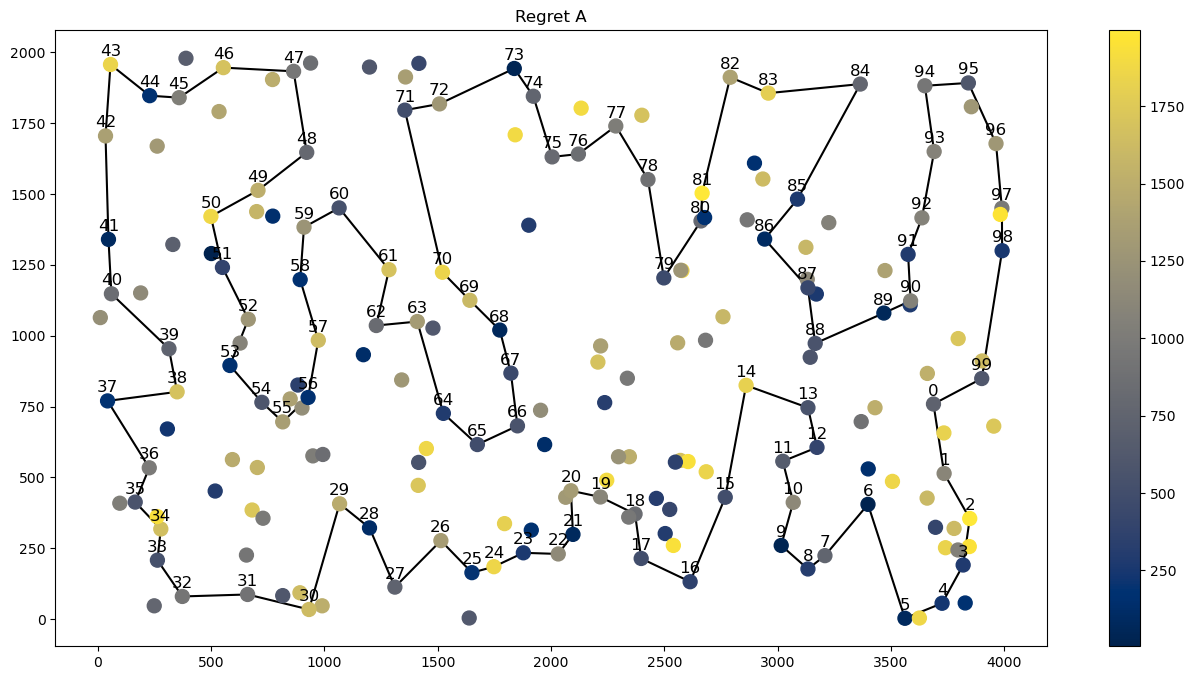

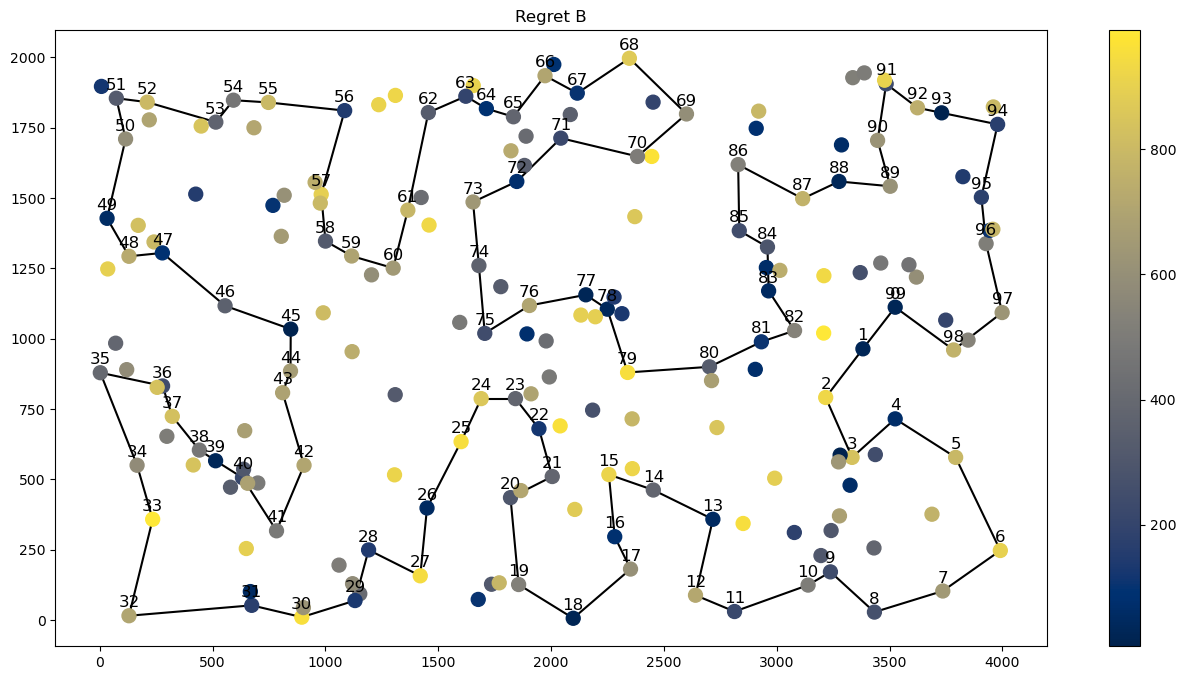

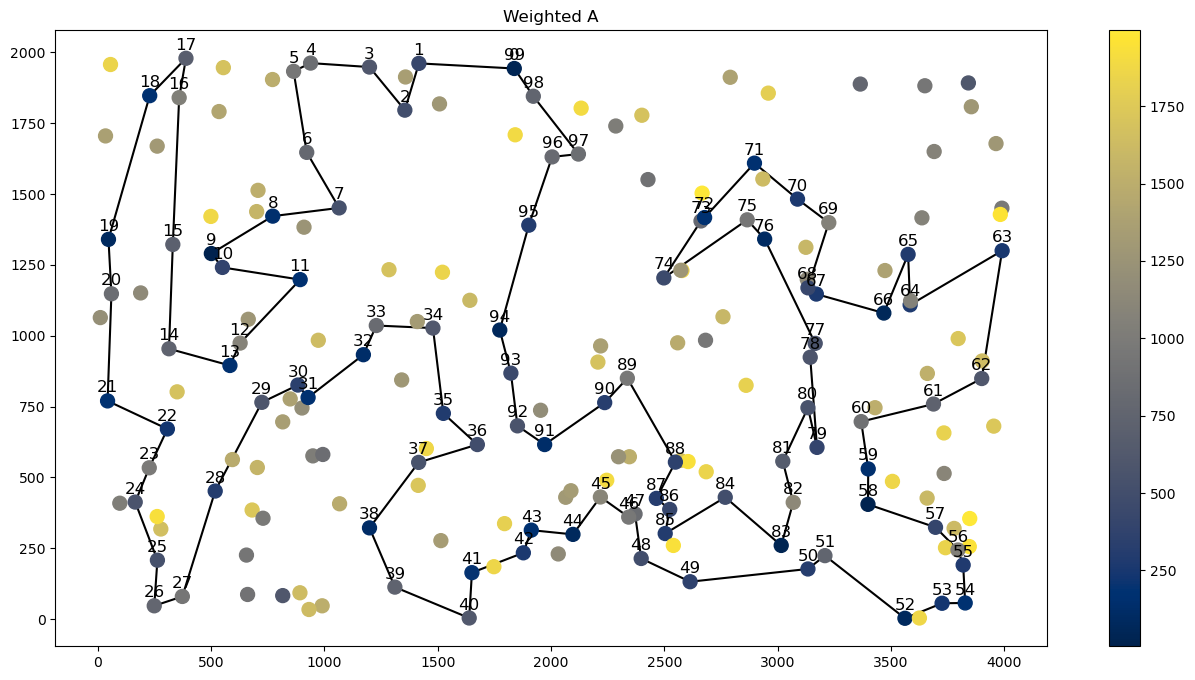

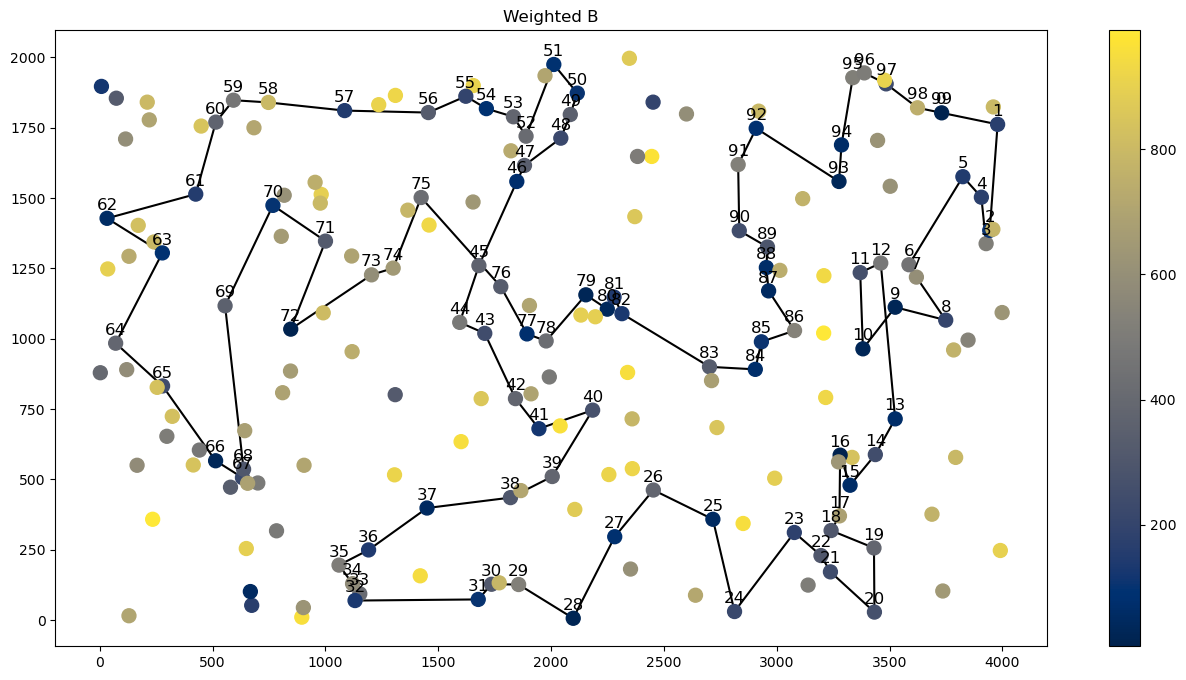

In [6]:
for index, ((_, _, _, solution), name) in enumerate(zip(experiments, columns)):
    if index % 2 == 0:
        tsp_a.plot(solution, name)
    else:
        tsp_b.plot(solution, name)

# Conclusions:

- __Greedy 2-regret__ performed poorly on both problem instances; the result lies between random solution and Nearest Neighbor End
- __Weighted 2-regret__ is the best method so far, outperforming all the others
